## 1. Data Format

In [6]:
# Function to read data based on file extension
def read_data(file_path):
    _, file_ext = os.path.splitext(file_path)
    if file_ext == '.csv':
        return pd.read_csv(file_path)
    elif file_ext == '.json':
        return pd.read_json(file_path)
    elif file_ext in ['.xls', '.xlsx']:
        return pd.read_excel(file_path)
    else:
        raise ValueError("Unknown file format")

## 2. Duplicates

Pandas got us covered with the drop_duplicates() method, which erases all duplicated rows of a dataframe.

In [ ]:
# check if there are duplicates
def drop_duplicates(df, columns=None):
    if columns == None:
        df.drop_duplicates(inplace=True)
    else:
        df.drop_duplicates(subset=columns, inplace=True)
    return df

## 3. Missing Values

Pandas offers us the .fillna() and .dropna() methods to handle these missing values effectively.

The choice of how we handle missing values depends on:

1. The type of values that are missing
2. The proportion of missing values relative to the number of total records we have. 

In [2]:
def check_missing_data(df):
    # check for missing values
    proportion_null_rows = 100 * (round(df.isnull().any(axis=1).sum()/df.any(axis=1).count(),2))
    if proportion_null_rows <= 5:
        print(f"There are {df.isnull().any(axis=1).sum()} rows with a null value. All of them are erased!")
        df.dropna()
    else:
        print("Too many null values, we need to check columns by columns further.")
        if df.isnull().sum().sum()>0:
            print("\nProportion of missing values by column")
            values = 100 * (round(df.isnull().sum()/df.count(),2))
            print(values)
            dealing_missing_data(df)
        else:
            print("No missing values detected!")
            
def dealing_missing_data(df):
    # handle the missing values
    values = 100 * (round(df.isnull().sum()/df.count(),2))
    to_delete = []
    to_impute = []
    to_check = []
    for name, proportion in values.items():
        if int(proportion) == 0:
            continue
        elif int(proportion <=10):
            to_impute.append(name)
            df.fillna(df[name].median())
        else:
            to_check.append(name)
    print(f"\nThe missing values in {to_impute} have been replaced by the median.")
    print(f"The columns {to_check} should be further understood")

## 5. Dealing with Outliers

Techniques to handle outliers include setting thresholds, capping values, or using statistical methods like Z-score.

In order to determine if we have outliers in our dataset, we use a common rule and consider any record outside of the following range as an outlier. [Q1 — 1.5 * IQR , Q3 + 1.5 * IQR]

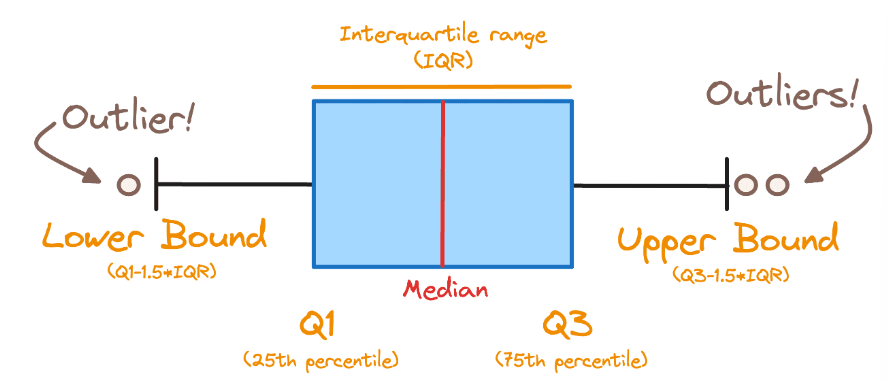

In [5]:
# Function to find outliers using IQR
def find_outliers_IQR(df):
    outlier_indices = []
    df = df.select_dtypes(include=['number'])
    for column in df.columns:
        for column in df.columns:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3-Q1
            lower_bound = Q1-1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Get the indices of outliers for feature column
            outlier_list_col = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
            outlier_indices.extend(outlier_list_col)
    
    outlier_indices = list(set(outlier_indices)) # get unique indices
    return df.iloc[outlier_indices]